机器学习作业2 线性回归多变量
此处为多变量回归，有两个特征为population和size.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.ma.core import power

In [64]:
path = "ex1data2.txt"
data = pd.read_csv(path,header=None,names=['population','size','profit'])
data.head()

,population,size,profit
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [65]:
def cal_cost(X, Y,theta):
    error = np.power((X*theta.T - Y),2)
    return np.sum(error)/(2*len(X))

In [66]:
def gredience(X,Y,theta,times,alpha):
    temp_w = np.matrix(np.zeros(theta.shape))
    param_num = int(theta.shape[1])
    cost = np.zeros(times)

    for i in range(times):
        error = (X*theta.T) - y
        for j in range(param_num):
            term = np.multiply(error,X[:,j])
            temp_w[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))
        theta = temp_w
        cost[i] = cal_cost(X,Y,theta)

    return theta,cost

In [67]:
data.describe()

,population,size,profit
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


由于这个数据数量级差距太大，要进行特征归一化，就是将每个特征减去他们的均值再和他们的标准差做比值即可

In [68]:
data = (data - data.mean()) / data.std()
data.insert(0,'ones',1)#先插入初始的b
data.head()
data.describe()

,ones,population,size,profit
count,47.0,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.0,3.779483e-17,2.746030e-16,-9.684924e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,1.0,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,1.0,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,1.0,3.376348e-01,1.090417e+00,3.521863e-01
max,1.0,3.117292e+00,2.404508e+00,2.874981e+00


In [69]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
Y = data.iloc[:,cols-1:cols]
X.head()

,ones,population,size
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [70]:
Y.head()

,profit
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


一样的代价函数应该为numpy矩阵，要先对X和Y进行转换，才能使用他们，这里其实为多变量回归，先初始化所有参数，但是要明确参数大小，这里参数大小应该为1*len(x)的行矩阵

In [71]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
theta = np.matrix(np.array([0,0,0]))

In [72]:
print(X.shape)
print(Y.shape)
print(theta.shape)

(47, 3)
(47, 1)
(1, 3)


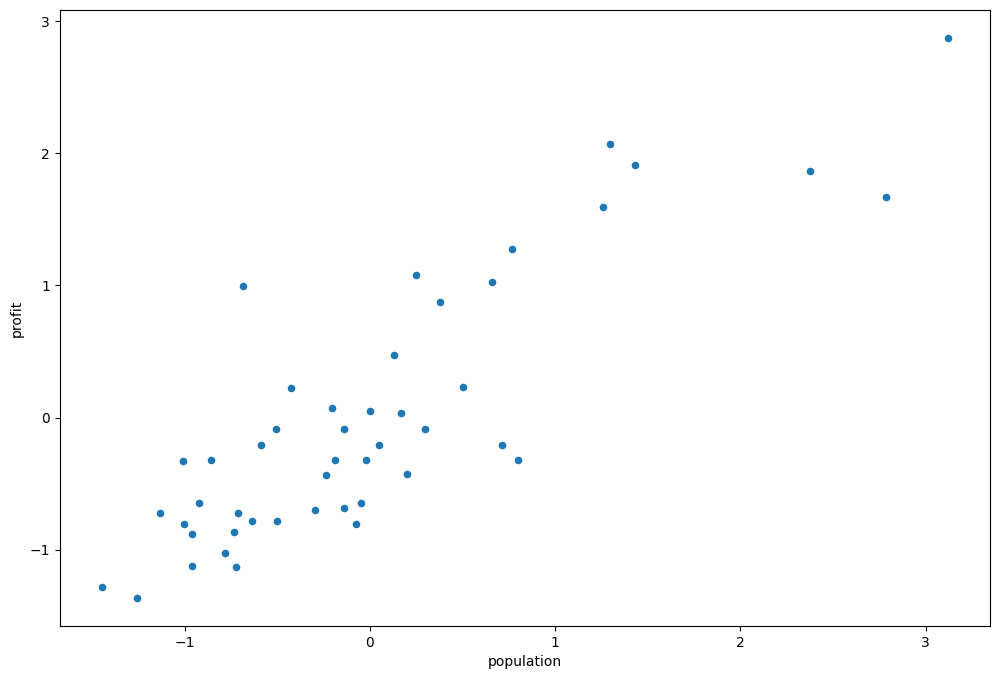

In [73]:
data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))
plt.show()

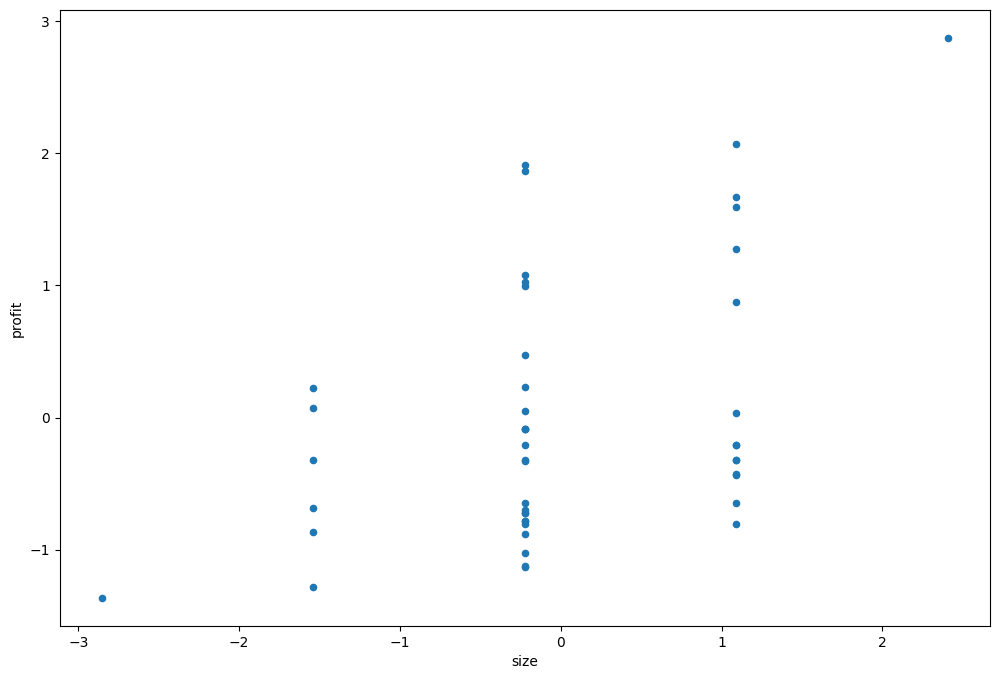

In [74]:
data.plot(kind='scatter',x='size',y='profit',figsize=(12,8))
plt.show()

In [75]:
alpha = 0.01
times = 1100

In [76]:
newTheta,cost = gredience(X,Y,theta,times,alpha)
print(newTheta)
print(cost)

/home/ldq/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_8918/2891690957.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  temp_w[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))


[[-1.10886477e-16  8.80698834e-01 -4.91117027e-02]]
[0.4805491  0.47198588 0.46366462 ... 0.13069373 0.13069367 0.1306936 ]


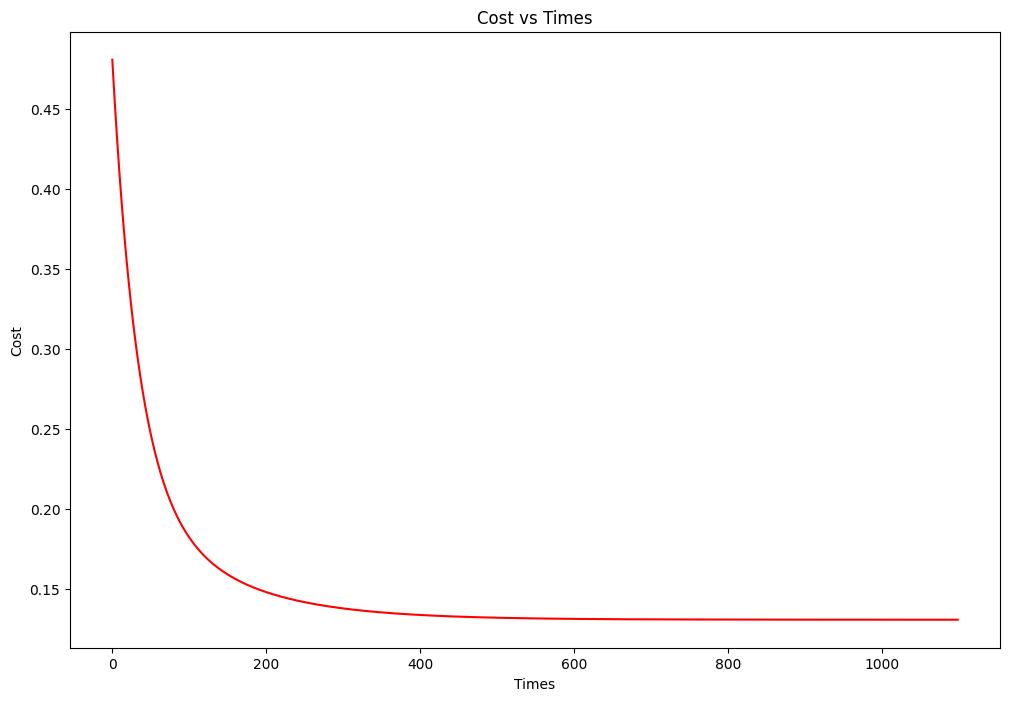

In [77]:
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(times),cost,'r',label = 'Cost')
ax.set_xlabel('Times')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Times')
plt.show()